In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### First we sample a million times from the Gaussian, Uniform, and Cauchy distributions, all centred at 0

In [2]:
N = 1000000

noise_gaussian = np.random.randn(N)
noise_uniform = np.random.rand(N) - 0.5 # move from [0, 1) to [-0.5, 1)
noise_cauchy = np.random.standard_cauchy(N)

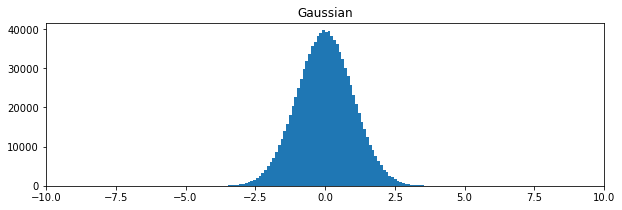

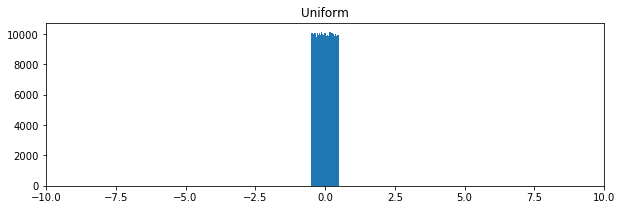

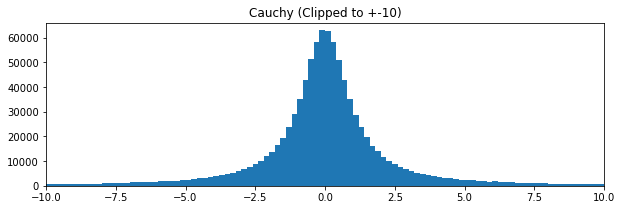

In [3]:
noise_types = [noise_gaussian, noise_uniform, noise_cauchy]
noise_label = ['Gaussian', 'Uniform', 'Cauchy']

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 3))
ax.hist(noise_types[0], bins=100)
ax.set_title(noise_label[0])
ax.set_xlim([-10, 10])
plt.show()

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 3))
ax.hist(noise_types[1], bins=100)
ax.set_title(noise_label[1])
ax.set_xlim([-10, 10])
plt.show()

# clip cauchy noise range for sake of plot
temp = noise_cauchy[np.abs(noise_cauchy)<10 ]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 3))
ax.hist(temp, bins=100)
ax.set_title(noise_label[2] + ' (Clipped to +-10)')
ax.set_xlim([-10, 10])
plt.show()

### Now we average over increasing sample sizes: 100, 200, ..., 1000000 and plot them

In [4]:
# all centred at 0

# running average of noise of steps of 100
step = 100

def growing_mean(x, step):
    rge = np.arange(1, len(x)//step+1)
    y = np.zeros((len(rge),))
    
    for i in rge:
        y[i-1] = np.mean(x[:i*step])
             
    return y

# generage average calculated over larger samples of noise
avg = np.empty((3, len(noise_types[0])//step))

for i in range(3):
    avg[i] = growing_mean(noise_types[i], step)

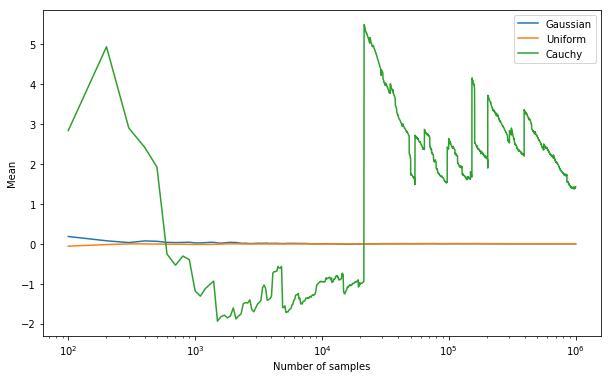

In [5]:
x = np.arange(1, len(noise_types[0])//step+1)*step

fig, ax  = plt.subplots(ncols=1, nrows=1, figsize=(10, 6))
for i in range(3):
    ax.semilogx(x, avg[i], label=noise_label[i])
ax.legend(loc='best')
ax.set_xlabel('Number of samples')
ax.set_ylabel('Mean')
plt.show()

### And so if the additive noise in function evaluations is from a Cauchy distribution, we cannot use the average fitness value as the mean of the noise does not tend to a specific value. This means we cannot compare the ranks of the averages of the noisy fitness evaluations.